# *Ecuación de Laplace en una placa cuadrada*
## *Comparación de Solución Analítica, Diferencias Finitas y PINN*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


## Ecuación de Laplace en una Placa Cuadrada con Condiciones de Dirichlet

El problema se define sobre la **placa cuadrada** $\Omega$:

$$\Omega = [0,L] \times [0,L]$$

---

### Ecuación Diferencial Parcial

La **Ecuación de Laplace** es una Ecuación Diferencial Parcial (EDP) elíptica y estacionaria:

$$\Delta u(x,y) = u_{xx}(x,y) + u_{yy}(x,y) = 0 \quad (x,y)\in\Omega$$

---

### Condiciones de Contorno de Dirichlet

Para determinar una única solución $u(x,y)$, se imponen las **Condiciones de Dirichlet** (valor fijo en el contorno):

$$\begin{cases}
u(x,0) = 0, & 0\le x \le L, \quad \text{(Lado inferior: cero)} \\
u(x,L) = f(x), & 0\le x \le L, \quad \text{(Lado superior: función impuesta)} \\
u(0,y) = 0, & 0\le y \le L, \quad \text{(Lado izquierdo: cero)} \\
u(L,y) = 0, & 0\le y \le L, \quad \text{(Lado derecho: cero)}
\end{cases}$$

Este problema modela la distribución de una propiedad (como la **temperatura**) en estado estacionario, donde tres lados se mantienen a cero y el cuarto lado tiene un perfil impuesto $f(x)$.

# 1. Solución Analítica

El método de Separación de Variables se aplica para resolver la Ecuación de Laplace ($\Delta u = 0$) con las condiciones de contorno de Dirichlet dadas.

1. Separación de Variables: Se busca una solución en la forma $u(x,y) = X(x)\,Y(y)$. Al sustituir en la Ecuación de Laplace ($X''Y + XY'' = 0$) y reordenar, se obtiene la igualdad de funciones que dependen solo de $x$ y solo de $y$, lo que debe ser igual a una constante de separación, $-\lambda$:$$X''(x)Y(y) + X(x)Y''(y) = 0 \quad\Rightarrow\quad \frac{X''(x)}{X(x)} = -\frac{Y''(y)}{Y(y)} = -\lambda$$Esto resulta en el siguiente sistema de Ecuaciones Diferenciales Ordinarias (EDOs):$$\begin{cases}
X''(x) + \lambda X(x) = 0, \\[4pt]
Y''(y) - \lambda Y(y) = 0.
\end{cases}$$

2. Determinación de $\lambda_n$ y $X_n(x)$: Las condiciones de contorno $u(0,y)=0$ y $u(L,y)=0$ se traducen en $X(0)=0$ y $X(L)=0$.El problema de Sturm-Liouville para $X(x)$ es:$$X''(x) + \lambda X(x) = 0, \quad X(0)=0, \quad X(L)=0$$Este problema tiene soluciones no triviales (modos propios) solo para los siguientes valores propios $\lambda_n$ (eigenvalores):$$\lambda_n = \left(\frac{n\pi}{L}\right)^2,\qquad n = 1,2,3,\dots$$Y las correspondientes funciones propias $X_n(x)$ (modos):$$X_n(x) = \sin\!\left(\frac{n\pi x}{L}\right)$$

3. Solución para $Y_n(y)$: Sustituyendo $\lambda_n$ en la EDO para $Y(y)$:$$Y_n''(y) - \left(\frac{n\pi}{L}\right)^2 Y_n(y)=0$$La solución general se expresa convenientemente con funciones hiperbólicas:$$Y_n(y) = C_n \sinh\!\left(\frac{n\pi}{L} y\right) + D_n \cosh\!\left(\frac{n\pi}{L} y\right)$$Se aplica la condición de contorno $u(x,0)=0$, lo que implica $Y_n(0)=0$.Dado que $\cosh(0)=1$ y $\sinh(0)=0$, esta condición fuerza a que $D_n = 0$.Por lo tanto, la solución para $Y_n(y)$ es:$$Y_n(y) = C_n \sinh\!\left(\frac{n\pi}{L} y\right)$$

4. Solución General y Armónicos: Cada solución particular $u_n(x,y) = X_n(x)Y_n(y)$ (incorporando la constante $C_n$ en un nuevo coeficiente $A_n$) es:$$u_n(x,y) = A_n \sin\!\left(\frac{n\pi x}{L}\right)\sinh\!\left(\frac{n\pi y}{L}\right)$$La solución general es una superposición (suma infinita) de estos modos, satisfaciendo la Ecuación de Laplace y las tres condiciones de contorno a cero:$$u(x,y) = \sum_{n=1}^{\infty} A_n \sin\!\left(\frac{n\pi x}{L}\right)\sinh\!\left(\frac{n\pi y}{L}\right)$$

5. Aplicación de la Última Condición y Coeficientes: Finalmente, se aplica la condición de contorno no homogénea $u(x,L)=f(x)$ para determinar los coeficientes $A_n$:$$f(x) = u(x,L) = \sum_{n=1}^{\infty} A_n \sin\!\left(\frac{n\pi x}{L}\right)\sinh\!\left(\frac{n\pi L}{L}\right)$$$$f(x) = \sum_{n=1}^{\infty} \left[A_n \sinh(n\pi)\right] \sin\!\left(\frac{n\pi x}{L}\right)$$Esto es una Serie de Fourier seno para la función $f(x)$. Los coeficientes de Fourier $B_n = A_n \sinh(n\pi)$ se hallan mediante la fórmula de coeficientes de Fourier:$$A_n \sinh(n\pi) = \frac{2}{L}\int_0^L f(x)\sin\!\left(\frac{n\pi x}{L}\right)\,dx$$Despejando $A_n$:$$A_n = \frac{2}{L}\frac{1}{\sinh(n\pi)}\int_0^L f(x)\sin\!\left(\frac{n\pi x}{L}\right)\,dx$$

6. Solución Final: La solución final $u(x,y)$ es la serie completa con los coeficientes $A_n$ determinados:$$\boxed{ u(x,y) = \sum_{n=1}^{\infty} \left( \frac{2}{L}\frac{1}{\sinh(n\pi)}\int_0^L f(\xi)\sin\!\left(\frac{n\pi \xi}{L}\right)d\xi \right)\sin\!\left(\frac{n\pi x}{L}\right)\sinh\!\left(\frac{n\pi y}{L}\right) }$$Donde se ha usado $\xi$ como variable de integración para distinguirla de $x$.

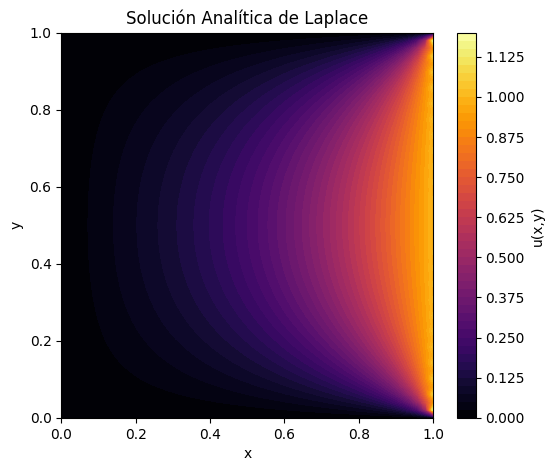

In [6]:
# La solución analítica (serie de Fourier) para las condiciones dadas es:
# u(x,y) = sum_{n=1,3,5,...} (4/pi) * (1/n) * sinh(n*pi*x)/sinh(n*pi) * sin(n*pi*y)

def u_analitica(x, y, N=50):
    u = np.zeros_like(x)
    for n in range(1, N, 2):  # solo términos impares
        u += (4/np.pi)*(1/n)*np.sinh(n*np.pi*x)/np.sinh(n*np.pi)*np.sin(n*np.pi*y)
    return u

# Mallado
nx, ny = 50, 50
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
X, Y = np.meshgrid(x,y)

U_analitica = u_analitica(X,Y)

# Graficar solución analítica
fig = plt.figure(figsize=(6,5))
plt.contourf(X, Y, U_analitica, 50, cmap='inferno')
plt.colorbar(label='u(x,y)')
plt.title("Solución Analítica de Laplace")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Solución Numérica por Diferencias Fínitas

Si no hay una solución analítica o se manejan condiciones de contorno complejas, el Método de Diferencias Finitas (DF) es una técnica numérica habitual para resolver la Ecuación de Laplace ($\Delta u = 0$).

1. Discretización y Malla Uniforme: Se discretiza el dominio $[0,L]\times[0,L]$ utilizando una malla uniforme de $N \times N$ intervalos, con un paso $h=L/N$.Los nodos de la malla son $x_i = i h$ y $y_j = j h$, para $i, j = 0, \dots, N$.$u_{i,j}$ es la aproximación de la solución $u(x_i, y_j)$ en el nodo $(i,j)$.Se utiliza el esquema central de segundo orden para aproximar las segundas derivadas parciales:$$u_{xx}(x_i,y_j) \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}$$$$u_{yy}(x_i,y_j) \approx \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2}$$

2. Ecuación Discreta (Esténcil de 5 Puntos): Sustituyendo estas aproximaciones en la Ecuación de Laplace $\Delta u = u_{xx} + u_{yy} = 0$:$$\frac{u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4 u_{i,j}}{h^2} = 0$$Al multiplicar por $h^2$ y reordenar, se obtiene la fórmula clave de DF:$$\boxed{ u_{i,j} = \frac{1}{4}\big(u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1}\big) }$$Esta expresión establece que el valor de la solución en cualquier nodo interior es el promedio de sus cuatro vecinos (superior, inferior, izquierdo y derecho), conocido como el esténcil de 5 puntos.

3. Construcción y Solución del Sistema Lineal: Aplicando la fórmula de promediado a todos los nodos interiores, se genera un sistema de ecuaciones lineales $A\mathbf{u} = \mathbf{b}$, donde $\mathbf{u}$ contiene los valores desconocidos de la solución en los nodos interiores, y $\mathbf{b}$ incorpora las condiciones de contorno fijadas. La Matriz $A$, es una matriz dispersa (sparse), simétrica y definida positiva.


4. Error y Convergencia, Orden de Error: El esquema de diferencias centrales utilizado es de segundo orden en $h$. Esto significa que el error de truncamiento global disminuye cuadráticamente con la reducción del paso de malla: $O(h^2)$.

5. Criterio de Parada: Los métodos iterativos requieren un criterio para detenerse, como que la norma del residuo ($\|A\mathbf{u}^{(k)} - \mathbf{b}\|$) sea pequeña, o que el cambio entre iteraciones sucesivas sea menor que una tolerancia predefinida.

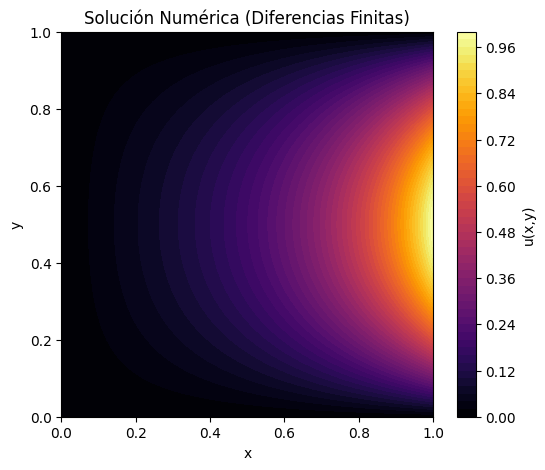

In [12]:
# Discretización de Laplace: u_{i,j} = (u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1})/4
nx, ny = 50, 50
u = np.zeros((nx, ny))

# Condiciones de frontera
u[:, -1] = np.sin(np.pi * y)  # x=1
u[0, :] = 0
u[-1, :] = np.sin(np.pi * y)
u[:, 0] = 0
u[:, -1] = 0
u[0, :] = 0
u[-1, :] = np.sin(np.pi * y)

# Iteración de Gauss-Seidel
for k in range(5000):
    u_old = u.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = 0.25*(u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1])
    if np.max(np.abs(u - u_old)) < 1e-6:
        break

# Graficar
plt.figure(figsize=(6,5))
plt.contourf(X, Y, u.T, 50, cmap='inferno')
plt.colorbar(label='u(x,y)')
plt.title("Solución Numérica (Diferencias Finitas)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 3. Solución Mediante una Implementación de PINN

Las Physics-Informed Neural Networks (PINN) son un enfoque de aprendizaje automático para resolver Ecuaciones Diferenciales Parciales (EDP), como la Ecuación de Laplace ($\Delta u = 0$) en $\Omega$.

1. Red Neuronal y Aproximación: Se utiliza una Red Neuronal (NN) $u_\theta(x,y)$ para aproximar la solución analítica $u(x,y)$, donde $\theta$ representa todos los pesos y sesgos entrenables de la red.

* Entradas: Las coordenadas espaciales $(x,y)$.
* Salida: La solución aproximada $u_\theta(x,y)$.

2. Pérdida Física (Residuo de la EDP): La clave de las PINN es el cálculo del residuo $r(x,y;\theta)$, que mide cuánto se desvía la solución aproximada de la EDP de Laplace ($\Delta u = 0$):$$r(x,y;\theta) = u_{xx}(x,y;\theta) + u_{yy}(x,y;\theta)$$Las derivadas de segundo orden ($u_{xx}$ y $u_{yy}$) se calculan utilizando autograd (diferenciación automática) sobre la salida de la red.La Pérdida Física ($\mathcal{L}_\text{phys}$) se define como el Error Cuadrático Medio (MSE) del residuo evaluado en un conjunto de puntos de collocación $(\mathbf{x}_f^{(i)} = x_f^{(i)}, y_f^{(i)})$ muestreados dentro del dominio $\Omega$:$$\mathcal{L}_\text{phys} = \frac{1}{N_f}\sum_{i=1}^{N_f} r(\mathbf{x}_f^{(i)};\theta)^2$$

3. Pérdida de Condiciones de Contorno (BC): Las condiciones de contorno (CC) también se imponen como una componente de la función de pérdida. Para el caso de condiciones de Dirichlet ($u = g_{\text{bc}}$ en la frontera):$$\mathcal{L}_\text{BC} = \frac{1}{N_{\text{bc}}}\sum_{j=1}^{N_{\text{bc}}} \big(u_\theta(\mathbf{x}_{\text{bc}}^{(j)}) - g_{\text{bc}}^{(j)}\big)^2$$Donde $\mathbf{x}_{\text{bc}}^{(j)}$ son los puntos muestreados en la frontera y $g_{\text{bc}}^{(j)}$ son los valores prescritos.

4. Entrenamiento y Pérdida Total: La Pérdida Total $\mathcal{L}(\theta)$ es una suma ponderada de las pérdidas física y de contorno:$$\mathcal{L}(\theta) = \mathcal{L}_\text{phys} + \lambda_{\text{BC}}\,\mathcal{L}_{\text{BC}}$$El entrenamiento consiste en minimizar $\mathcal{L}(\theta)$ ajustando los parámetros $\theta$ (pesos y sesgos) mediante un algoritmo de Descenso de Gradiente (p. ej., Adam).Se puede usar un peso $\lambda_{\text{BC}}$ (o varios pesos) para balancear las magnitudes de las diferentes pérdidas y asegurar una convergencia adecuada.

Epoca 0, Loss Value: 1.8302e-01
Epoca 500, Loss Value: 3.4885e-02
Epoca 1000, Loss Value: 7.6739e-03
Epoca 1500, Loss Value: 2.9192e-03
Epoca 2000, Loss Value: 1.8863e-03
Epoca 2500, Loss Value: 1.3673e-03


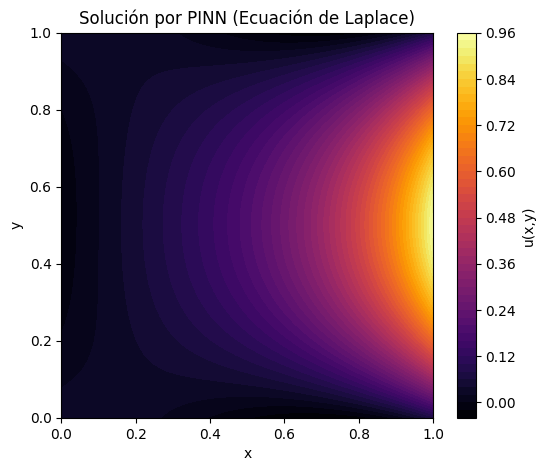

In [14]:
x = torch.linspace(0,1,50)
y = torch.linspace(0,1,50)
X, Y = torch.meshgrid(x,y, indexing='ij')
xy = torch.cat([X.reshape(-1,1), Y.reshape(-1,1)], dim=1)

# Red neuronal simple
class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )
    def forward(self, x, y):
        XY = torch.cat([x,y], dim=1)
        return self.net(XY)

model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Entrenamiento
for epoch in range(3000):
    optimizer.zero_grad()

    # Activar seguimiento de gradientes
    x_in = xy[:,0].reshape(-1,1).clone().detach().requires_grad_(True)
    y_in = xy[:,1].reshape(-1,1).clone().detach().requires_grad_(True)

    u_pred = model(x_in, y_in)

    # Derivadas de primer y segundo orden
    u_x = torch.autograd.grad(u_pred, x_in, torch.ones_like(u_pred), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x_in, torch.ones_like(u_x), create_graph=True)[0]
    u_y = torch.autograd.grad(u_pred, y_in, torch.ones_like(u_pred), create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y_in, torch.ones_like(u_y), create_graph=True)[0]

    # Residuo de la ecuación de Laplace
    eq_loss = torch.mean((u_xx + u_yy)**2)

    # Pérdida de frontera
    mask_left = (x_in == 0)
    mask_right = (x_in == 1)
    mask_bottom = (y_in == 0)
    mask_top = (y_in == 1)

    bc_loss = torch.mean((u_pred[mask_left])**2) \
             + torch.mean((u_pred[mask_bottom])**2) \
             + torch.mean((u_pred[mask_top])**2) \
             + torch.mean((u_pred[mask_right] - torch.sin(np.pi*y_in[mask_right]))**2)

    loss = 0.8*eq_loss + 0.2*bc_loss
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoca {epoch}, Loss Value: {loss.item():.4e}")

# Visualización
xv, yv = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50))
xv_t = torch.tensor(xv.reshape(-1,1), dtype=torch.float32)
yv_t = torch.tensor(yv.reshape(-1,1), dtype=torch.float32)
u_pred = model(xv_t, yv_t).detach().numpy().reshape(50,50)

plt.figure(figsize=(6,5))
plt.contourf(xv, yv, u_pred, 50, cmap='inferno')
plt.colorbar(label='u(x,y)')
plt.title("Solución por PINN (Ecuación de Laplace)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Observaciones sobre PINN para Laplace**

* No requiere mallado: A diferencia de DF o Elementos Finitos, PINN no requiere la discretización del dominio en una malla fija.
* Derivadas exactas: Las derivadas se obtienen de manera analítica (vía autograd), no por aproximaciones discretas.
* Desafío en EDPs Elípticas: La convergencia de PINN puede ser más compleja para problemas elípticos (como Laplace) que para problemas con dependencia temporal.
* Es crucial:
   Una densidad adecuada de puntos de collocación.
   Un balance correcto de los pesos ($\lambda$) de las pérdidas.

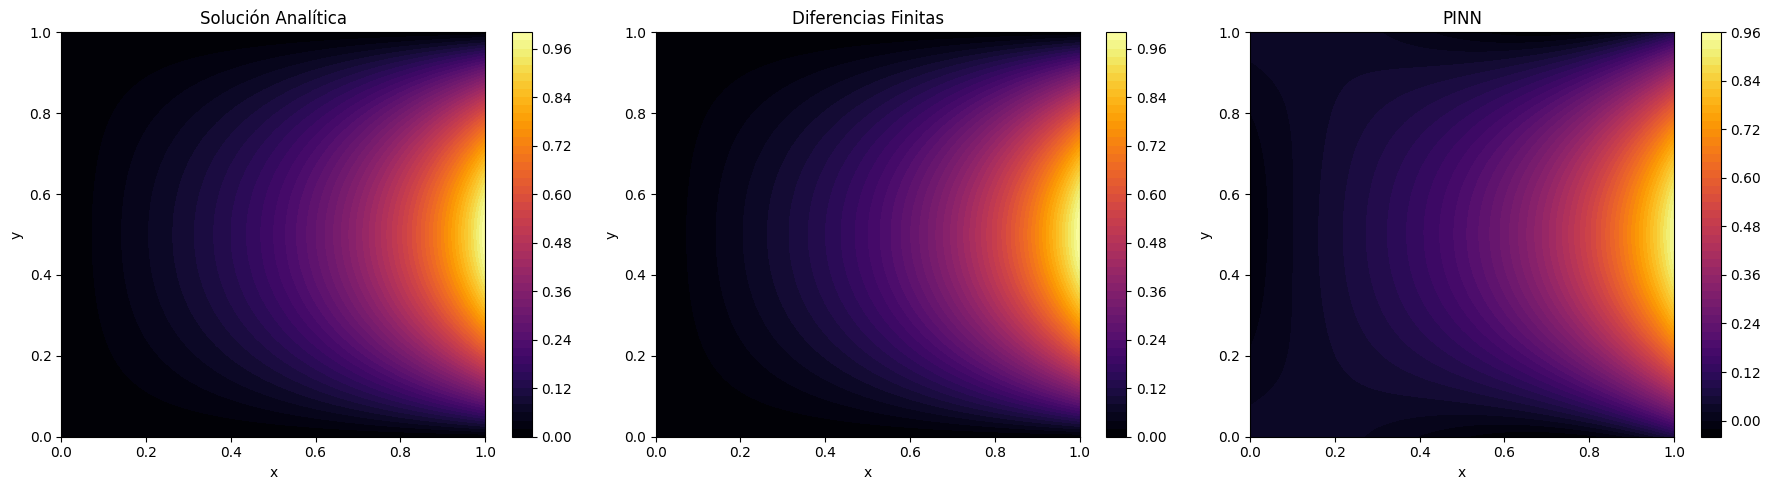

Error RMS Diferencias Finitas vs Analítica: 6.8378e-05
Error RMS PINN vs Analítica: 1.6546e-02


In [15]:
# Solución analítica
Xn, Yn = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50))
u_exact = np.sinh(np.pi * Xn) * np.sin(np.pi * Yn) / np.sinh(np.pi)

# Diferencias finitas
# Tu variable se llama 'u', y al graficar se uso u.T (transpuesta)
u_fd = u.T  # Asegurarla misma orientación que las otras soluciones

# PINN
# u_pred calculado en el bloque anterior (debe ser 50x50)

# Gráficos comparativos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

titles = ['Solución Analítica', 'Diferencias Finitas', 'PINN']
solutions = [u_exact, u_fd, u_pred]

for i in range(3):
    cs = axs[i].contourf(Xn, Yn, solutions[i], 50, cmap='inferno')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    plt.colorbar(cs, ax=axs[i])

plt.tight_layout()
plt.show()

# Comparación numérica mediante Error RMS
error_fd = np.sqrt(np.mean((u_fd - u_exact)**2))
error_pinn = np.sqrt(np.mean((u_pred - u_exact)**2))
print(f"Error RMS Diferencias Finitas vs Analítica: {error_fd:.4e}")
print(f"Error RMS PINN vs Analítica: {error_pinn:.4e}")

# ¿Cómo mejorar la PINN?



La precisión de una Physics-Informed Neural Network (PINN) al resolver una EDP elíptica, como la Ecuación de Laplace, depende críticamente de la arquitectura de la red, la formulación de la pérdida y la estrategia de entrenamiento. A continuación, se detallan los métodos clave para optimizar la solución.

1. Optimización de la Arquitectura de la RedLa capacidad de la PINN para aprender la solución $u(x,y)$ y sus derivadas depende de su diseño estructural:

* Profundidad y Ancho: Generalmente, aumentar el número de capas ocultas (profundidad, p. ej., 3 a 6 capas) o el número de neuronas por capa (ancho, p. ej., 64–256 neuronas) incrementa la capacidad de la red para aproximar funciones complejas. Esto es crucial ya que $u_\theta(x,y)$ debe ser lo suficientemente suave y rica para que sus derivadas de segundo orden sean precisas.

* Funciones de Activación: Se prefieren funciones de activación suaves y no saturantes como $\tanh$ (tangente hiperbólica) o $\text{SiLU}$ (Sigmoid Linear Unit). Estas funciones evitan la saturación de los gradientes, facilitando la propagación de las derivadas de alto orden (autograd) a través de la red, lo que es esencial para el cálculo preciso del residuo de Laplace.

* Inicialización y Normalización:La normalización de entradas (escalado del dominio a, por ejemplo, $[-1,1]$) ayuda a que los gradientes sean de magnitudes similares en todo el espacio de entrada, lo que estabiliza el entrenamiento.Utilizar esquemas de inicialización como Xavier o He garantiza que los pesos iniciales no sean ni demasiado grandes (causando saturación) ni demasiado pequeños (causando gradientes nulos), promoviendo una convergencia más rápida.

2. Refinamiento de la Función de Pérdida: La función de pérdida total ($\mathcal{L}(\theta) = \mathcal{L}_{\text{phys}} + \lambda_{\text{BC}}\mathcal{L}_{\text{BC}}$) debe reflejar con precisión tanto la física como las condiciones de contorno:

* Hard Constraints (Restricciones Duras): Para garantizar el cumplimiento exacto de las condiciones de frontera (CC), se puede diseñar una solución de prueba (trial solution). Esta solución incorpora las CC explícitamente, por ejemplo, multiplicando la salida de la NN por una función $\psi(x,y)$ que es cero en la frontera, asegurando que la solución final satisfaga la CC.
* Muestreo Adaptativo: En lugar de muestrear puntos de collocation de manera uniforme, el muestreo adaptativo asigna más puntos de entrenamiento a las áreas donde el residuo físico ($|r(x,y;\theta)|$) o la pérdida de CC es mayor. Esto mejora la representación de las zonas de mayor complejidad (p. ej., esquinas o cerca de discontinuidades en las condiciones de contorno) sin aumentar excesivamente el costo computacional.
*Equilibrio de la Pérdida (Ponderación Adaptativa): El uso de coeficientes de ponderación ($\lambda_{\text{BC}}$) es crucial. Si la pérdida de la física domina, la red ignora las CC; si la pérdida de CC domina, la red viola la EDP. Las técnicas de ponderación adaptativa buscan ajustar estos $\lambda$ dinámicamente durante el entrenamiento para mantener ambas pérdidas en equilibrio.

3. Estrategias Avanzadas de Entrenamiento: El optimizador y las técnicas de regularización juegan un papel importante en la eficiencia y la calidad de la solución:

* Estrategia Híbrida de Optimización: La combinación de optimizadores, como la estrategia Adam + LBFGS, es muy efectiva.Adam se usa inicialmente, ya que es robusto y eficiente para explorar el espacio de parámetros.LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) se usa para la fase final, ya que refina la solución con mayor precisión alrededor de un mínimo local.
* Manejo de Gradientes:Ajuste Dinámico de la Tasa de Aprendizaje: Disminuir la tasa de aprendizaje a medida que avanza el entrenamiento (p. ej., mediante learning rate schedulers) ayuda a evitar oscilaciones cerca del mínimo y permite una convergencia más fina.
* Gradient Clipping: Limitar la magnitud de los gradientes (recorte) es una técnica de regularización que previene el fenómeno de exploding gradients, común al diferenciar repetidamente la NN.
* Regularización:Introducir términos de regularización $L2$ en la pérdida ayuda a evitar el sobreajuste (overfitting) al penalizar pesos grandes, lo que promueve soluciones más suaves y generalizables.
* Técnicas Avanzadas:Curriculum Learning: Entrenar la red progresivamente, comenzando con datos fáciles (p. ej., dominios más pequeños o funciones de contorno simples) y avanzando a datos más complejos, puede aumentar la estabilidad.
* Domain Decomposition: Dividir el dominio complejo en subregiones y entrenar una red local para cada subregión (o usar redes separadas) es útil para geometrías complejas o soluciones con fuertes gradientes localizados, mejorando la escalabilidad y precisión.

Entrenando PINN (fase Adam)...
Epoch 1000, Loss: 5.2935e-05
Epoch 2000, Loss: 1.3954e-05
Epoch 3000, Loss: 7.9637e-06
Epoch 4000, Loss: 9.6872e-05
Epoch 5000, Loss: 3.3412e-06
Epoch 6000, Loss: 3.7686e-05
Epoch 7000, Loss: 1.8630e-06
Epoch 8000, Loss: 1.5566e-06
Fase LBFGS...


/usr/local/lib/python3.12/dist-packages/torch/optim/lbfgs.py:457: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  loss = float(closure())



Error RMS Diferencias Finitas vs Analítica: 4.7045e-05
Error RMS PINN vs Analítica: 1.4455e-06


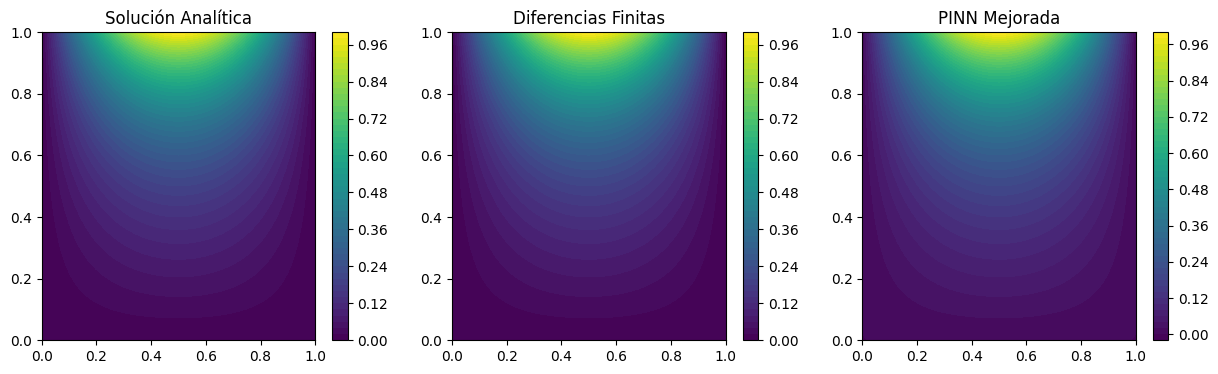

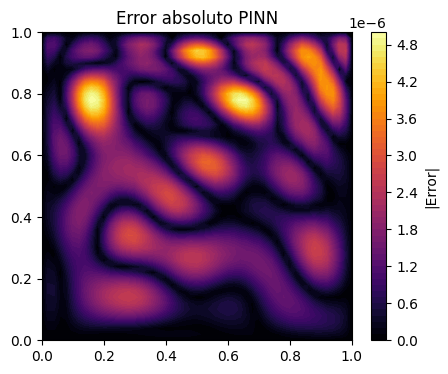

In [ ]:
# 1. Solución Analítica

def analytical_solution(x, y):
    return np.sin(np.pi * x) * np.sinh(np.pi * y) / np.sinh(np.pi)

# Malla para evaluación
N = 51
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
U_exact = analytical_solution(X, Y)


#2. Diferencias Finitas

def laplace_fd(Nx=51, Ny=51, tol=1e-6, max_iter=10000):
    u = np.zeros((Ny, Nx))
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)

    # Condiciones de frontera
    u[:, 0] = 0
    u[:, -1] = 0
    u[0, :] = 0
    u[-1, :] = np.sin(np.pi * x)

    h = 1/(Nx-1)
    for _ in range(max_iter):
        u_new = u.copy()
        u_new[1:-1, 1:-1] = 0.25*(u[1:-1, :-2] + u[1:-1, 2:] +
                                  u[:-2, 1:-1] + u[2:, 1:-1])
        if np.linalg.norm(u_new - u, ord=np.inf) < tol:
            break
        u = u_new
    return u

U_fd = laplace_fd()

# 3. PINN mejorada

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Datos de entrenamiento
N_f = 8000
X_f = np.random.rand(N_f, 1)
Y_f = np.random.rand(N_f, 1)
XY_f = np.hstack([X_f, Y_f])

# Convertir a tensores
XY_f_t = torch.tensor(XY_f, dtype=torch.float32, requires_grad=True).to(device)

# Red neuronal
class Net(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
        self.activation = nn.Tanh()

    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = self.activation(layer(x))
        return self.layers[-1](x)

# Crear red
layers = [2, 128, 128, 128, 1]
net = Net(layers).to(device)

# Solution con condiciones de frontera duras
def trial_u(xy, net):
    x = xy[:, 0:1]
    y = xy[:, 1:2]
    # Escalamos entrada a [-1, 1]
    xy_scaled = 2.0 * xy - 1.0
    N_out = net(xy_scaled)
    return x*(1-x)*y*(1-y)*N_out + y*torch.sin(np.pi*x)

# Entrenamiento PINN
def loss_fn(xy):
    u = trial_u(xy, net)
    grads = torch.autograd.grad(u, xy, grad_outputs=torch.ones_like(u),
                                create_graph=True)[0]
    u_x = grads[:, 0:1]
    u_y = grads[:, 1:2]
    u_xx = torch.autograd.grad(u_x, xy, grad_outputs=torch.ones_like(u_x),
                               create_graph=True)[0][:, 0:1]
    u_yy = torch.autograd.grad(u_y, xy, grad_outputs=torch.ones_like(u_y),
                               create_graph=True)[0][:, 1:2]
    resid = u_xx + u_yy
    return torch.mean(resid**2)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2000, gamma=0.5)

print("Entrenando PINN (fase Adam)...")
for epoch in range(8000):
    optimizer.zero_grad()
    loss = loss_fn(XY_f_t)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4e}")

# Afinamiento con LBFGS
optimizer_lbfgs = torch.optim.LBFGS(net.parameters(), lr=1.0, max_iter=500)

def closure():
    optimizer_lbfgs.zero_grad()
    loss = loss_fn(XY_f_t)
    loss.backward()
    return loss

print("Fase LBFGS...")
optimizer_lbfgs.step(closure)

# Evaluar en malla
xy_test = np.hstack([X.flatten()[:, None], Y.flatten()[:, None]])
xy_test_t = torch.tensor(xy_test, dtype=torch.float32).to(device)
with torch.no_grad():
    u_pred = trial_u(xy_test_t, net).cpu().numpy().reshape(N, N)

# 4. Comparación y métricas
def rms_error(u1, u2):
    return np.sqrt(np.mean((u1 - u2)**2))

err_fd = rms_error(U_fd, U_exact)
err_pinn = rms_error(u_pred, U_exact)
print(f"\nError RMS Diferencias Finitas vs Analítica: {err_fd:.4e}")
print(f"Error RMS PINN vs Analítica: {err_pinn:.4e}")

# 5. Visualización
titles = ['Solución Analítica', 'Diferencias Finitas', 'PINN Mejorada']
solutions = [U_exact, U_fd, u_pred]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, title, sol in zip(axes, titles, solutions):
    im = ax.contourf(X, Y, sol, 50, cmap='viridis')
    ax.set_title(title)
    fig.colorbar(im, ax=ax)
plt.show()

# Mapa del error PINN
plt.figure(figsize=(5,4))
plt.contourf(X, Y, np.abs(u_pred - U_exact), 50, cmap='inferno')
plt.colorbar(label='|Error|')
plt.title("Error absoluto PINN")
plt.show()


# *TAREA (Problema de Poisson 2D)*

Sea el dominio $\Omega=[0,1]\times[0,1]$. Resuelve la ecuación de Poisson:$$\Delta u(x,y)=−2\pi^{2}\sin(\pi x)\sin(\pi y),\qquad (x,y)\in\Omega,$$con condiciones de Dirichlet homogéneas en la frontera:$$u(x,y)=0\quad\text{para }(x,y)\in\partial\Omega.$$

Solución Exacta: La solución exacta es:$$\boxed{\,u(x,y)=\sin(\pi x)\sin(\pi y)\,}$$(Verificación): Comprueba directamente que $\Delta u = u_{xx}+u_{yy} = -2\pi^{2}\sin(\pi x)\sin(\pi y)$ y que la condición de frontera ($u=0$ en $\partial\Omega$) se cumple.

Tareas Obligatorias (Entregables)

1. Derivación Analítica (Breve)Verificar algebraicamente que la función propuesta es solución del problema. Escribir las comprobaciones de las segundas derivadas parciales, $u_{xx}$ y $u_{yy}$.Verificar la ecuación de Poisson ($\Delta u = f$). Verificar la Condición de Frontera (BC).(Máx. 1 página).

2. Método Numérico — Diferencias Finitas (FD) Discretización: Discretizar el dominio $\Omega$ con una malla uniforme $N\times N$ (sugerido $N=51, 101$).Formulación: Formular el esquema de 5 puntos para $\Delta u$ y armar el sistema lineal $A\mathbf{u}=\mathbf{b}$.Resolución: Resolver con un solver iterativo (Gauss–Seidel o SOR) y con un solver directo para comparación (e.g., usando SciPy).Métricas:Calcular y reportar la norma RMS y la norma $L^\infty$ del error frente a la solución exacta, para al menos dos refinamientos de malla.Incluir tiempos de ejecución para ambos solvers.

3. PINN (Physics-Informed Neural Network)Arquitectura: Construir una red $u_{\theta}(x,y) \approx u(x,y)$ (denotada $\mathrm{NN}(x,y;\theta)$) que aproxime $u$.Residuo y Pérdida:Usar el residuo $r(x,y)=u_{xx}+u_{yy} + 2\pi^{2}\sin(\pi x)\sin(\pi y)$.Minimizar la pérdida total $\mathcal{L} = \mathcal{L}_{\mathrm{phys}} + \mathcal{L}_{\mathrm{BC}}$, donde $\mathcal{L}_{\mathrm{phys}}=\mathrm{MSE}(r)$ en puntos de collocation interiores, y $\mathcal{L}_{\mathrm{BC}}$ es la pérdida en la frontera.

Mejoras Obligatorias:Implementar una trial solution $u_{\text{trial}}$ que garantice las BC (hard constraints).Normalizar entradas a $[-1,1]$.Entrenar con Adam y afinar con LBFGS.

Reporte:Reportar RMS y $L^\infty$ del error usando la misma malla que en FD.Mostrar mapas de residuo y del error absoluto.

4. Comparación y AnálisisVisualización: Tres gráficos comparativos (Solución Analítica / FD / PINN). Mapas de error absoluto para cada método.Un scatter/heatmap del residuo de la PINN.

Comentario Crítico: Discusión sobre ventajas/desventajas observadas; dónde falla cada método y por qué (resolución, tratamiento BC, arquitectura, sampling). (Máx. 1 página).

Requisitos Técnicos y Recomendaciones:
Diferencias Finitas (FD)Implementar el esquema de 5 puntos (para $A\mathbf{u}=\mathbf{b}$).Para SOR, probar $\omega\in[1.0,1.9]$.
Usar la condición de convergencia: $\lVert u^{k+1}-u^k\rVert_\infty<10^{-8}$ o un máximo de iteraciones.

PINN Arquitectura Sugerida: $[2, 128, 128, 128, 1]$ con activación $\tanh$.
Puntos de Collocation: Usar $8\mathrm{k}–20\mathrm{k}$ puntos.
Precisión: Considerar float64 si hay problemas numéricos.
Optimizadores: Adam ($lr \approx 1\mathrm{e}{-3}$ con scheduler) seguido de LBFGS ($200–1000$ iteraciones).
Trial Solution ($u_{\text{trial}}$): Utilizar la forma $u_{\text{trial}}(x,y) = x(1-x)y(1-y)N(x,y)$ o cualquier otra forma que imponga BC exactas ($u_{\text{trial}}|_{\partial\Omega}=0$). (Adaptar si las entradas están normalizadas a $[-1, 1]$).
Métricas Norma RMS: $\sqrt{\frac{1}{M}\sum (u_{\text{num}}-u_{\text{exact}})^2}$.Norma $L^\infty$ (Error Máximo): $\max|u_{\text{num}}-u_{\text{exact}}|$.Mostrar también el máximo absoluto del residuo en la malla.
EntregaNotebook (o .py) reproducible con celdas ejecutables y figuras embebidas.Un PDF de una página con conclusiones.Añadir comentarios en el código que expliquen parámetros seleccionados.

* Criterios de Evaluación (Sugeridos, %)
* Correctitud analítica y verificación (15%).
* Implementación FD y convergencia / análisis de error (25%).
* Implementación PINN con mejoras exigidas (trial solution, normalización, optimizer strategy) y documentación (30%).
* Comparación, visualización y discusión crítica (20%).
* Limpieza del notebook y reproducibilidad (10%).